# Я БУДУ ИНТЕГРИРОВАТЬ ВСЕ ИНТЕГРАЛЫ

Средние прямоугольники

Integral of 1/sin(sqrt(x)) =  3.6638624157136963


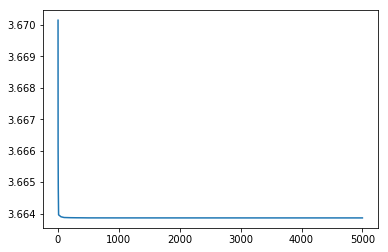

In [58]:
import numpy as np

import matplotlib.pyplot as plt
from collections import namedtuple
from scipy import optimize
from scipy import integrate

def integrate_rectangle(f, a, b, nsteps = 1000):
    measure = (b - a) / nsteps
    res = 0.
    for i in range (0, nsteps):
        res += f(a + i*measure + measure/2) * measure
    return res

def f_1(x):
    return 1 / np.sin ( np.sqrt(x) ) - 1 / np.sqrt(x)


def integral_1(a, b, nsteps = 1000):
    return integrate_rectangle(f_1, a, b, nsteps) + np.pi
    

x = np.asarray((1, 2, 5, 10, 50, 100, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000, 10000))
y = [integral_1(0, (np.pi ** 2) / 4, np.int(s)) for s in x]

x1 = np.asarray((1, 2, 5, 10, 50, 100, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000))
pl1 = [(y[i+1])  for i in range(0, len(y) - 1)]

print("Integral of 1/sin(sqrt(x)) = ", y[len(y)-1])

plt.plot(x1, pl1)
plt.show()

    

На графике сверху - значение интеграла в зависимости от толщины разбиения сетки

Если не выделять сингулярность в отдельный интеграл:

Integral of 1/sin(sqrt(x)) =  3.6543606903692716


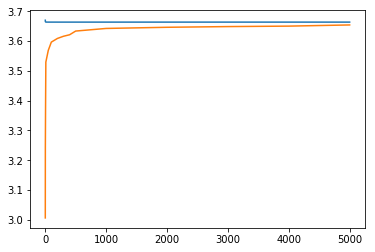

In [59]:
def f(x):
    return 1/np.sin(np.sqrt(x))

x = np.asarray((1, 2, 5, 10, 50, 100, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000, 10000))
y = [integrate_rectangle(f, 0, (np.pi ** 2) / 4, np.int(s)) for s in x]

x2 = np.asarray((1, 2, 5, 10, 50, 100, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000))
pl2 = [(y[i+1]) for i in range(0, len(y) - 1)]

print("Integral of 1/sin(sqrt(x)) = ", y[len(y)-1])

plt.plot(x1, pl1)
plt.plot(x2, pl2)
plt.show()

    

Синенький - с регуляризацией, оранжевенький - без. Crazy!

Интегрирование второго интеграла квадратурами (Чебышев). Наша функция четная, поэтому наш интеграл - половинка от интеграла по [-1,1]

In [60]:
from scipy.special import roots_chebyt

def func(x):
    return ( (1 + x ** 2) )

def normalize (func, x, a, b):
    
    return func( x )

def integral_gauss (func, a, b, n):
    roots, weights = roots_chebyt(n)
  
    
    return np.sum( normalize(func, roots, a, b) * weights)

def integral_optimized(func, a, b, nstart = 1, rtol = 1e-5):
    n = nstart
    last = integral_gauss(func, a, b, n)
    n +=1
    new = integral_gauss(func, a, b, n)
    
    while(np.abs( (new - last) / last) >= rtol):
        n += 1
        last = new
        new = integral_gauss(func, a, b, n)
        
    return new * (b - a) / 2, n

integral, n = integral_optimized(func, 0.0, 1.0, 1, 1e-5)
print ("Интеграл:", integral)
print("n:", n)
    

Интеграл: 2.356194490192345
n: 3


Идеально! Теперь прямоугольниками:

Integral =  2.3476398669572993


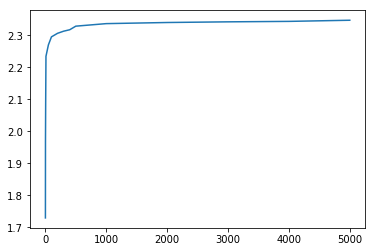

In [61]:
def func_1(x):
    return ( (1 + x ** 2)/ np.sqrt(1 - x ** 2) )

x = np.asarray((1, 2, 5, 10, 50, 100, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000, 10000))
y = [integrate_rectangle(func_1, 0, (1) , np.int(s)) for s in x]

x1 = np.asarray((1, 2, 5, 10, 50, 100, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000))
pl1 = [(y[i+1]) for i in range(0, len(y) - 1)]

print("Integral = ", y[len(y)-1])

plt.plot(x1, pl1)

plt.show()



Грустно

С выделением сингулярности:

Integral =  2.3561944040836353


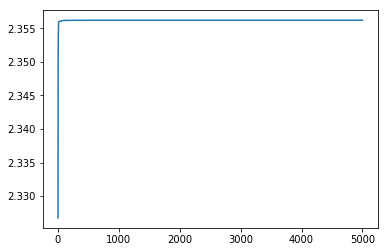

In [62]:
def func_2(x):
    return (x ** 2 - 1) / np.sqrt (1 - x ** 2)


x = np.asarray((1, 2, 5, 10, 50, 100, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000, 10000))
y = [integrate_rectangle(func_2, -1, 0 , np.int(s)) for s in x]


x2 = np.asarray((1, 2, 5, 10, 50, 100, 200, 300, 400, 500, 1000, 2000, 3000, 4000, 5000))
pl2 = [(y[i+1] + np.pi) for i in range(0, len(y) - 1)]

print("Integral = ", y[len(y)-1] + np.pi)

plt.plot(x2, pl2)

plt.show()







Этот пободрее (и при том же разбиении с Чебышевым сходится лучше)